# Sales Prediction Model:

In this task, we have been given the advertising dataset on Kaggle.Our goal is to predict the variable 'Sales'. 

## Contents of notebook:

Following are the main chapters of the notebook:  
    
1. Overview of dataset.
2. Data Preprossesing
3. Data Visualization
4. Implementation of Multiple Regression
5. Validation of Results.
6. Conclusion

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing and loading dataset
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Overview of the Dataset

Let's begin by familiarising ourselves with the properties of the variables present in the dataset.

In [3]:
df.shape

(200, 4)

Or dataset contains 200 rows and 4 columns.

In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Checking for null values

In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There are no null values,this is a great dataset to work with.

In [7]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

All the variables contain float values.

# Data Preprocessing

### Checking for Outliers

First we check for outliers. First, we plot boxplots to check for outliers.

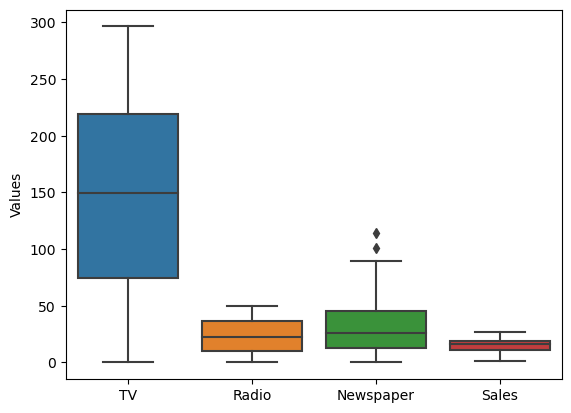

In [11]:
sns.boxplot(data=df,orient='v')
plt.ylabel('Values')
plt.show()

### Removing Outliers

It seems that the newspaper column contains some outliers. We shall remove them using the IQR method.

In [12]:

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(df['Newspaper'], 25)
Q3 = np.percentile(df['Newspaper'], 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
data_no_outliers = df[(df['Newspaper'] >= lower_bound) & (df['Newspaper'] <= upper_bound)]

df=data_no_outliers


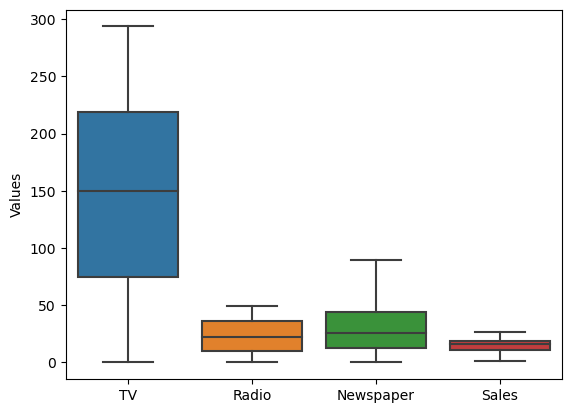

In [13]:
sns.boxplot(data=df,orient='v')
plt.ylabel('Values')
plt.show()

So finally,our data set is

In [14]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


We can also see the correlation between the different variables with respect to sales.

In [15]:
#checking correlation
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.899974
Radio,0.051978,1.000000,0.346364,0.348566
Newspaper,0.049771,0.346364,1.000000,0.151764
Sales,0.899974,0.348566,0.151764,1.000000


The correlation table clearly shows that 'TV' variables has the highest correlation with sales.

# Data Visualization

Now we move towards visualizing our data.

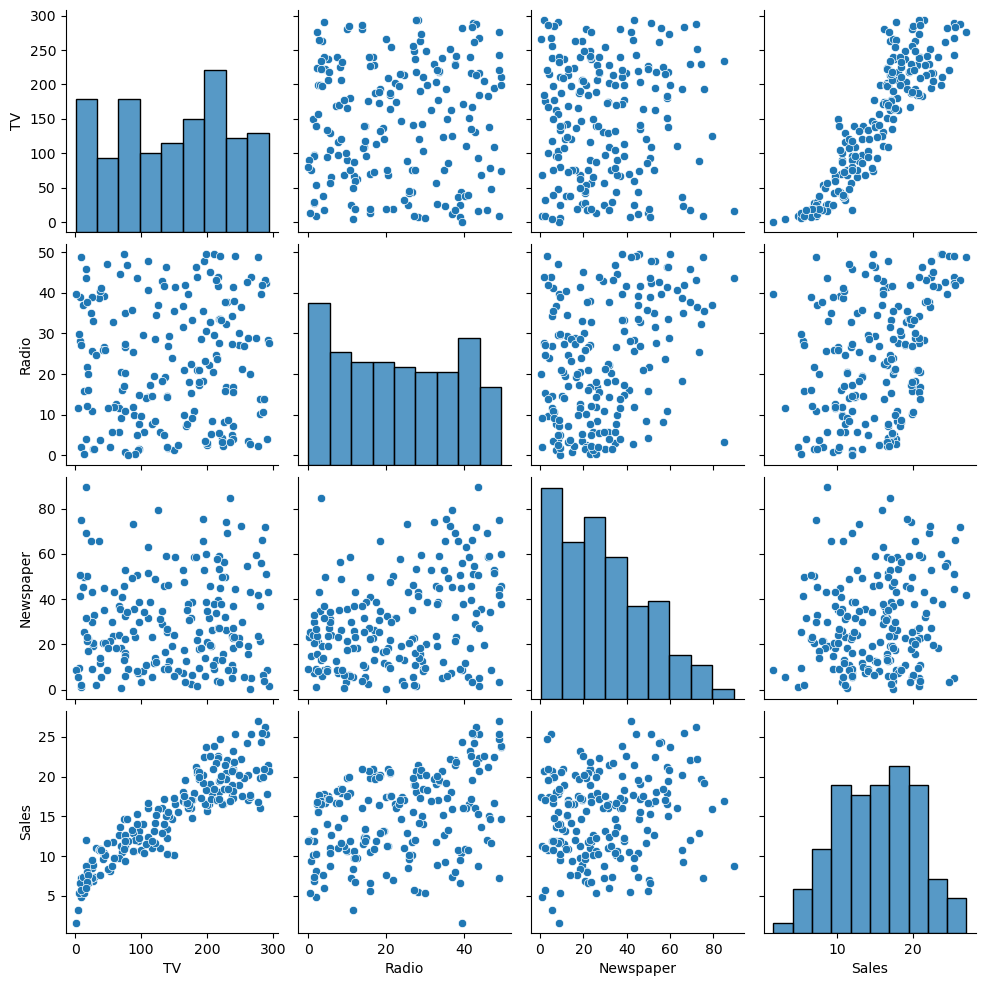

In [16]:
sns.pairplot(df)

We can visualize the coreelation that we calculated as a heatmap

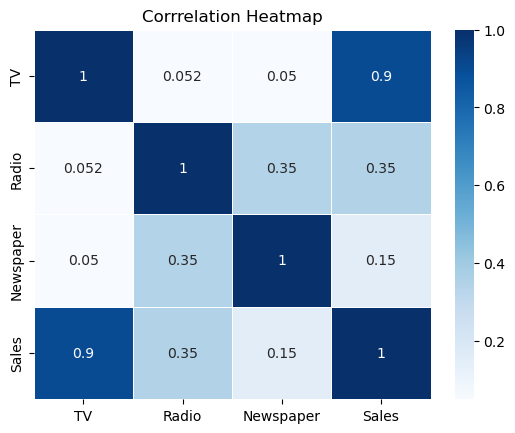

In [17]:
sns.heatmap(df.corr(),annot=True,cmap='Blues',linewidth=0.5)
plt.title('Corrrelation Heatmap')
plt.show()

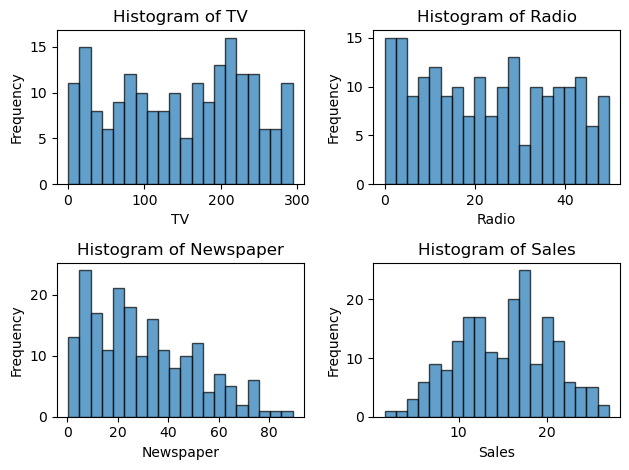

In [18]:
plt.subplot(2,2,1)
plt.hist(df['TV'],bins=20,edgecolor='black',alpha=0.7)
plt.title('Histogram of TV')
plt.xlabel('TV')
plt.ylabel('Frequency')


plt.subplot(2,2,2)
plt.hist(df['Radio'],bins=20,edgecolor='black',alpha=0.7)
plt.title('Histogram of Radio')
plt.xlabel('Radio')
plt.ylabel('Frequency')


plt.subplot(2,2,3)
plt.hist(df['Newspaper'],bins=20,edgecolor='black',alpha=0.7)
plt.title('Histogram of Newspaper')
plt.xlabel('Newspaper')
plt.ylabel('Frequency')


plt.subplot(2,2,4)
plt.hist(df['Sales'],bins=20,edgecolor='black',alpha=0.7)
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()  # Ensure proper spacing between subplots

plt.show()



Now, we make some scatter plots to check the relationship between each variable and sales.

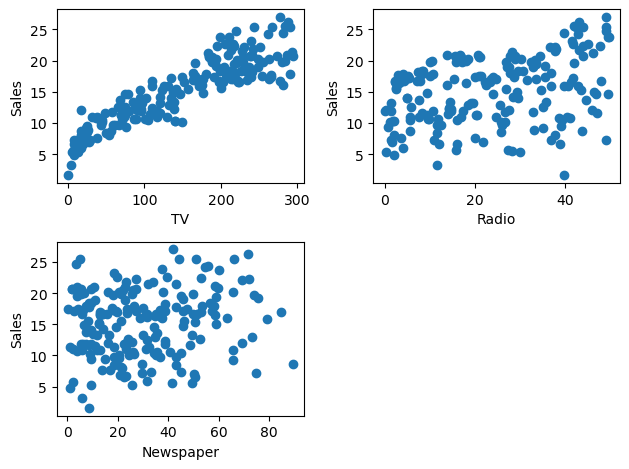

In [19]:

plt.subplot(2,2,1)
plt.scatter(df['TV'],df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(2,2,2)
plt.scatter(df['Radio'],df['Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')

plt.subplot(2,2,3)
plt.scatter(df['Newspaper'],df['Sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.tight_layout()  # Ensure proper spacing between subplots

plt.show()

# Linear Regression

Now that we are done with our data analysis and have prepared our dataset,we can begin building our machine learning model. We will use Linear Regression as our model of choice, where 'Sales' will be the target varaible and the rest of the variables will be used to predict sales.

## Splitting the Data Set

We begin by seperating our dataset into testing and training data.

In [20]:
from sklearn.model_selection import train_test_split
x=df.drop(['Sales'],axis=1)
y=df['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

## Fitting the Model

In [21]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## Making Predictions

In [30]:
y_pred=model.predict(x_test)
print(y_pred)

[13.05582129 10.08061688  9.9688625  20.84443691 18.92335887 20.77293448
 17.17289241  7.97402432 18.60004491 12.03956861 20.65647464 19.37511934
 12.38335006 23.69286625 19.2367747  21.34832016 24.14846281 17.18631256
 14.14939089 21.11955015 10.32333094 19.43065985 10.66634984 12.05496967
 23.37784889 15.63343869  6.01134692 16.32654046  8.03427001 17.21331414
 18.17837472 23.61783814 15.58952567 19.55591433  7.90740263 13.89517548
 18.7385419  12.10260507 19.4518198  10.95536391]


# Validation of results

We will validate our model using techniques such as the mean absolute error, mean squared error and r-squared value. 

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 1.1197401694517317


In [25]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 1.9969180990668647


In [26]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 1.413123525763712


In [27]:
# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)

R-squared (R²): 0.9252032996336332


# Conclusion:

We applied Multiple Regression model on our dataset, the corresponding values of MAE,MSE and R-squared show that it is a good model,providing relatively accurate predictions.